In [1]:
%matplotlib inline


# Plot the decision surface of different models trained on the iris dataset

Before moving more into deep learning for NLP, we will compare the decision surface of multiple models on the Iris dataset. The Iris dataset consists of classifiyng flowers into 3 classes. As input, each sample contains some biological feature (e.g., sepal length, petal width, etc).

For some pair of iris features, the models learn decision
boundaries using the training samples.

/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_6150/3810196173.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_6150/3810196173.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_6150/3810196173.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_6150/3810196173.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_6150/3810196173.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_6150/3

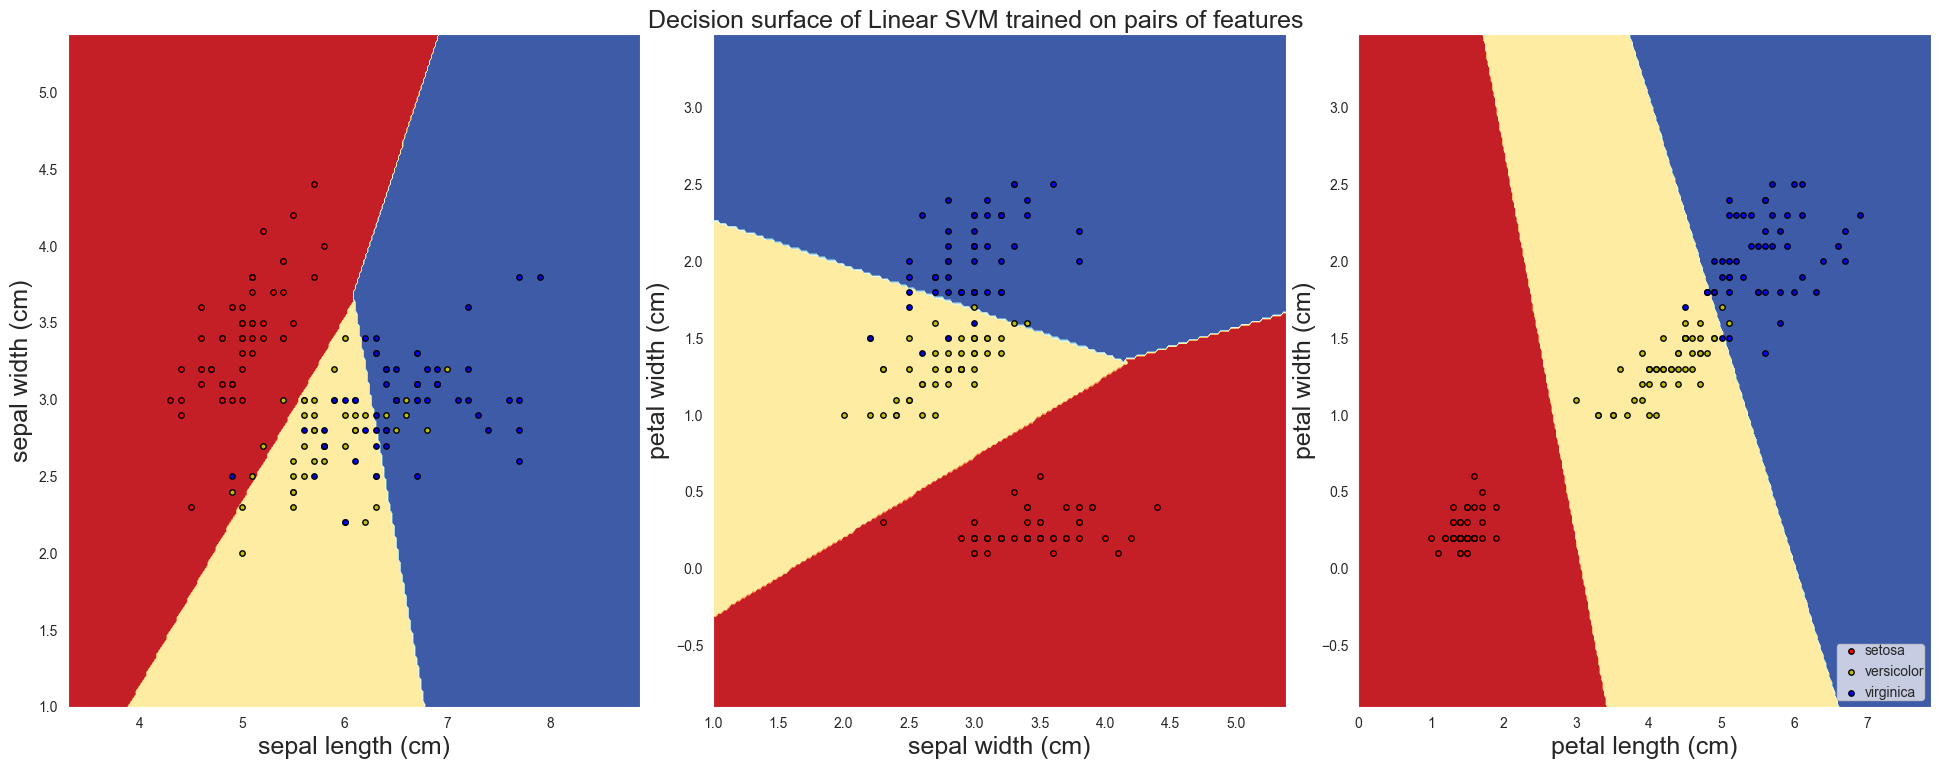

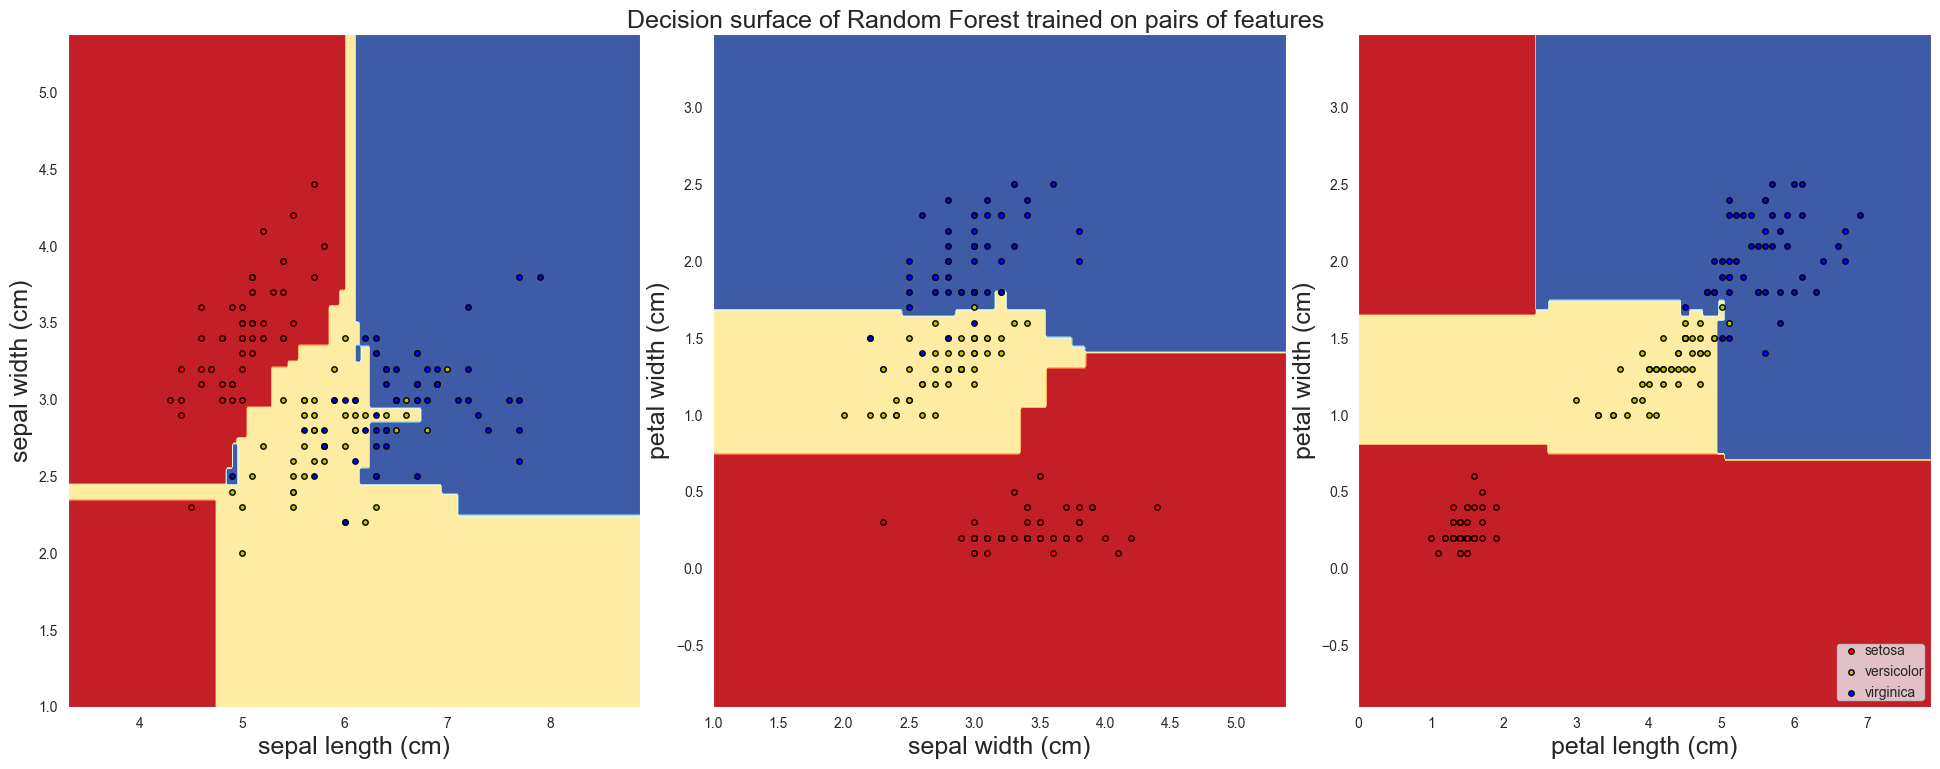

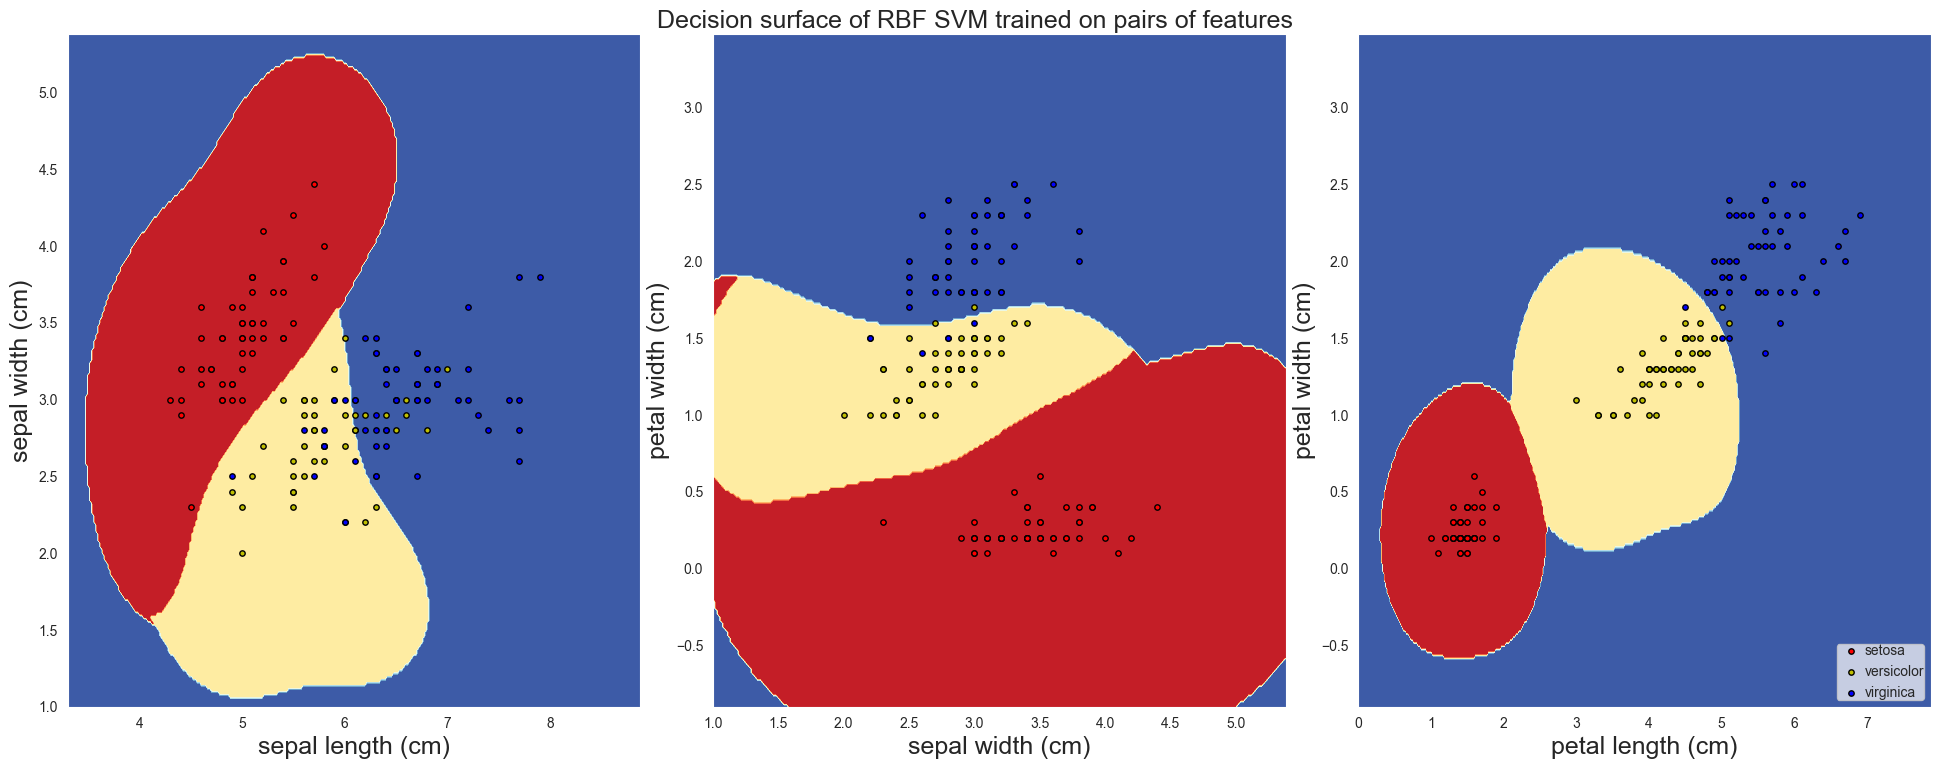

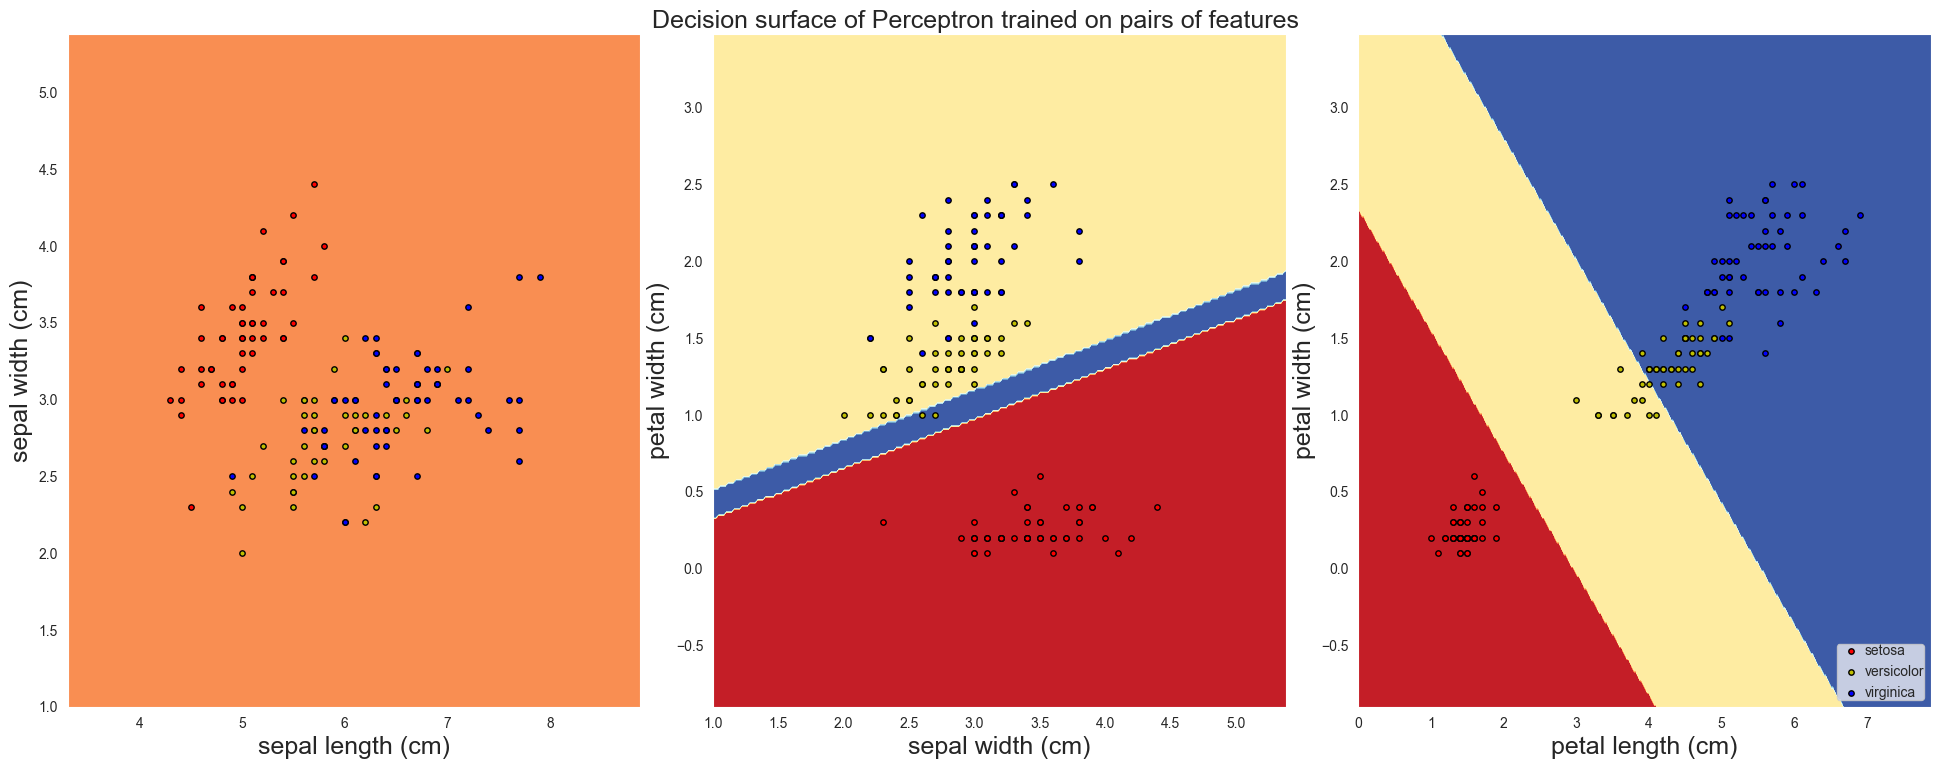

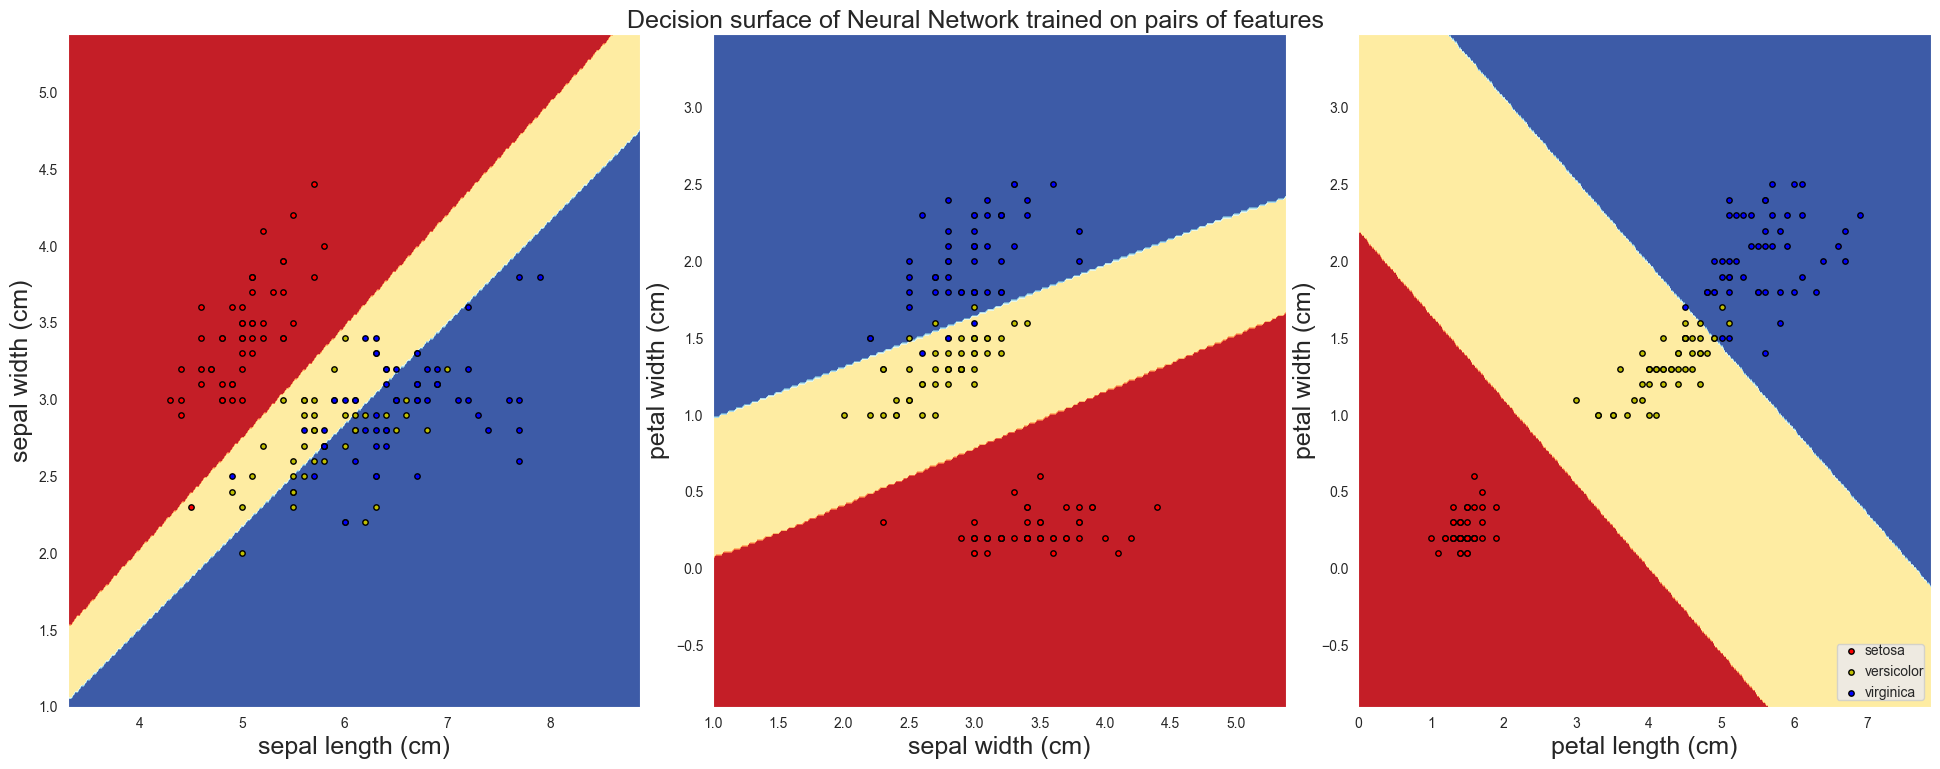

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# List our classifiers
classifiers = [
    ("Linear SVM", SVC(kernel="linear", C=0.025)),
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ("RBF SVM", SVC(gamma=2, C=1)),
    
    # Here are our perceptron and neural network. Don't hesitate to check the documentation https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    ("Perceptron", MLPClassifier(alpha=0.1, max_iter=1000, hidden_layer_sizes=(1,))),
    ("Neural Network", MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(10,))),
    # Add your new model here afterwards
]

# Load the dataset
iris = load_iris()

for classifier_name, classifier in classifiers:
    fig = plt.figure(figsize=(20, 8))

    for pairidx, pair in enumerate([[0, 1], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf = classifier.fit(X, y)

        # Plot the decision boundary
        plt.subplot(1, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]], fontsize=18)
        plt.ylabel(iris.feature_names[pair[1]], fontsize=18)

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(
                X[idx, 0],
                X[idx, 1],
                c=color,
                label=iris.target_names[i],
                cmap=plt.cm.RdYlBu,
                edgecolor="black",
                s=15,
            )

    plt.suptitle("Decision surface of " + classifier_name + " trained on pairs of features", fontsize=18)
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")

# Exercise

What code should we write for the following model:
- L2 weight decay of 1e-6
- A maximum of 1000 iterations
- MLP 3 layers of 25, 50, 75 neurons
- Tanh as the non-linear activation function
- A learning rate of 1e-4
- Use stochastic gradient descent instead of Adam
- Batch size of 16 samples
- Use early stoping

In [3]:
("New Neural Network", MLPClassifier()),

(('New Neural Network', MLPClassifier()),)

Now add your new model in the previous cell. How does it compare visually with other models?

In [4]:
#@title Solution
("New Neural Network", MLPClassifier(alpha=1e-6,
                                     max_iter=1000,
                                     hidden_layer_sizes=(25, 50, 75),
                                     activation='tanh',
                                     learning_rate_init=1e-4,
                                     learning_rate='constant',
                                     batch_size=16,
                                     early_stopping=True)),

(('New Neural Network',
  MLPClassifier(activation='tanh', alpha=1e-06, batch_size=16,
                early_stopping=True, hidden_layer_sizes=(25, 50, 75),
                learning_rate_init=0.0001, max_iter=1000)),)